In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [2]:
import seaborn as sns
import pandas_profiling
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [3]:
from sklearn import datasets
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

### Importing training and testing data files : 

In [4]:
train = pd.read_csv('/Users/yashsinghai/Desktop/Analytixlabs_Python/case_studies/3. Network Intrusion Detection System/NSL_Dataset/Train.txt')

In [5]:
train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [6]:
train.shape

(125972, 43)

In [7]:
test = pd.read_csv('/Users/yashsinghai/Desktop/Analytixlabs_Python/case_studies/3. Network Intrusion Detection System/NSL_Dataset/Test.txt')

In [8]:
test.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [9]:
test.shape

(22543, 43)

In [10]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [11]:
train.columns = columns
test.columns = columns

In [12]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [13]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [16]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [17]:
test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### Binning using 'attack' column, and thus creating a new column 'attack_type'

In [18]:
train['attack'].value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [19]:
test['attack'].value_counts()

normal             9711
neptune            4656
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
loadmodule            2
worm                  2
perl                  2
sqlattack             2
phf                   2
udpstorm              2
imap                  1
Name: attack, dtype: int64

In [20]:
train['attack_class']=np.where(train.attack=='normal',0,np.where((train.attack=='back') | (train.attack=='land') | (train.attack=='pod') | (train.attack=='neptune') | 
         (train.attack=='smurf') | (train.attack=='teardrop') | (train.attack=='apache2') | (train.attack=='udpstorm') | 
         (train.attack=='processtable') | (train.attack=='worm') | (train.attack=='mailbomb'),1,np.where((train.attack=='satan') | (train.attack=='ipsweep') | (train.attack=='nmap') | (train.attack=='portsweep') | 
          (train.attack=='mscan') | (train.attack=='saint'),2,np.where((train.attack=='guess_passwd') | (train.attack=='ftp_write') | (train.attack=='imap') | (train.attack=='phf') | 
          (train.attack=='multihop') | (train.attack=='warezmaster') | (train.attack=='warezclient') | (train.attack=='spy') | 
          (train.attack=='xlock') | (train.attack=='xsnoop') | (train.attack=='snmpguess') | (train.attack=='snmpgetattack') | 
          (train.attack=='httptunnel') | (train.attack=='sendmail') | (train.attack=='named'),3,4))))

In [21]:
test['attack_class']=np.where(test.attack=='normal',0,np.where((test.attack=='back') | (test.attack=='land') | (test.attack=='pod') | (test.attack=='neptune') | 
         (test.attack=='smurf') | (test.attack=='teardrop') | (test.attack=='apache2') | (test.attack=='udpstorm') | 
         (test.attack=='processtable') | (test.attack=='worm') | (test.attack=='mailbomb'),1,np.where((test.attack=='satan') | (test.attack=='ipsweep') | (test.attack=='nmap') | (test.attack=='portsweep') | 
          (test.attack=='mscan') | (test.attack=='saint'),2,np.where((test.attack=='guess_passwd') | (test.attack=='ftp_write') | (test.attack=='imap') | (test.attack=='phf') | 
          (test.attack=='multihop') | (test.attack=='warezmaster') | (test.attack=='warezclient') | (test.attack=='spy') | 
          (test.attack=='xlock') | (test.attack=='xsnoop') | (test.attack=='snmpguess') | (test.attack=='snmpgetattack') | 
          (test.attack=='httptunnel') | (test.attack=='sendmail') | (test.attack=='named'),3,4))))

In [22]:
train.drop('attack', axis = 1, inplace = True)

In [23]:
test.drop('attack', axis = 1, inplace = True)

### Data Preparation : 

##### 1. Train data

In [24]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,1


In [25]:
dummy_protocol_type=pd.get_dummies(train['protocol_type'],prefix='protocol',drop_first=True)
dummy_service=pd.get_dummies(train['service'],prefix='service',drop_first=True)
dummy_flag=pd.get_dummies(train['flag'],prefix='flag',drop_first=True)

In [26]:
train = pd.concat([train,dummy_protocol_type,dummy_service,dummy_flag],axis=1)

In [27]:
train.drop(['protocol_type','service','flag'],axis=1, inplace = True)

In [28]:
train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


##### 2. Test data

In [29]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,21,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,15,2
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11,2
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,21,0


In [30]:
dummy_protocol_type=pd.get_dummies(test['protocol_type'],prefix='protocol',drop_first=True)
dummy_service=pd.get_dummies(test['service'],prefix='service',drop_first=True)
dummy_flag=pd.get_dummies(test['flag'],prefix='flag',drop_first=True)

In [31]:
test = pd.concat([test,dummy_protocol_type,dummy_service,dummy_flag],axis=1)

In [32]:
test.drop(['protocol_type','service','flag'],axis=1, inplace = True)

In [33]:
test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,267,14515,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


#### Since the train data has 6 columns more than the test data, we will find out the difference columns and remove them from the train data to bring them to an equal number of columns.

In [34]:
unique = set(train.columns.tolist())-set(test.columns.tolist())
unique

{'service_aol',
 'service_harvest',
 'service_http_2784',
 'service_http_8001',
 'service_red_i',
 'service_urh_i'}

In [35]:
train.drop(['service_aol','service_harvest','service_http_2784','service_http_8001','service_red_i',
                        'service_urh_i'],axis=1, inplace = True)

In [36]:
train.shape

(125972, 115)

In [37]:
test.shape

(22543, 115)

##### No missing value imputation as there are no missing values.

In [38]:
train.isnull().sum()

duration          0
src_bytes         0
dst_bytes         0
land              0
wrong_fragment    0
                 ..
flag_S1           0
flag_S2           0
flag_S3           0
flag_SF           0
flag_SH           0
Length: 115, dtype: int64

In [39]:
test.isnull().sum()

duration          0
src_bytes         0
dst_bytes         0
land              0
wrong_fragment    0
                 ..
flag_S1           0
flag_S2           0
flag_S3           0
flag_SF           0
flag_SH           0
Length: 115, dtype: int64

### Train and test data split : 

##### 1. Train data

In [40]:
X_train = train[train.columns.difference(['attack_class'])]
y_train = train['attack_class']

In [41]:
X_train.head()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,service_vmnet,service_whois,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment
0,13,0.15,0,255,0.60,0.0,0.88,0.00,0.00,1,...,0,0,146,1,0.00,0.0,0.0,0,0,0
1,123,0.07,0,255,0.05,0.0,0.00,0.10,1.00,26,...,0,0,0,6,0.00,0.0,1.0,0,0,0
2,5,0.00,8153,30,0.00,0.0,0.03,1.00,0.03,255,...,0,0,232,5,0.00,0.0,0.2,0,0,0
3,30,0.00,420,255,0.00,0.0,0.00,1.00,0.00,255,...,0,0,199,32,0.09,0.0,0.0,0,0,0
4,121,0.06,0,255,0.07,1.0,0.00,0.07,0.00,19,...,0,0,0,19,0.00,1.0,0.0,0,0,0


In [42]:
y_train.head()

0    0
1    1
2    0
3    0
4    1
Name: attack_class, dtype: int64

##### 2. Test data

In [43]:
X_test = test[train.columns.difference(['attack_class'])]
y_test = test['attack_class']

In [44]:
X_test.head()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,service_vmnet,service_whois,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment
0,136,0.06,0,255,0.06,1.00,0.00,0.00,0.00,1,...,0,0,0,1,0.00,1.0,0.00,0,0,0
1,1,0.00,0,134,0.04,0.00,0.61,0.61,0.00,86,...,0,0,12983,1,0.00,0.0,0.00,0,0,0
2,1,0.00,0,3,0.00,0.00,1.00,1.00,0.00,57,...,0,0,20,65,1.00,0.0,0.00,0,0,0
3,1,0.00,15,29,0.17,0.83,0.03,0.31,0.00,86,...,0,0,0,8,0.75,0.5,0.12,0,0,0
4,4,0.00,14515,155,0.00,0.00,0.01,1.00,0.01,255,...,0,0,267,4,0.00,0.0,0.00,0,0,0


In [45]:
y_test.head()

0    1
1    0
2    2
3    2
4    0
Name: attack_class, dtype: int64

### Logistic regression model :

In [46]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(n_jobs=-1)

In [47]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_pred = log_reg.predict(X_test)

In [49]:
log_reg.score(X_test, y_test)

0.6322583507075367

In [50]:
train_score = log_reg.score(X_train, y_train)
train_score

0.8540866224240308

In [51]:
lr_test_pred = pd.DataFrame({'actual':y_test,'predicted':y_pred})
lr_test_pred.head()

,actual,predicted
0,1,1
1,0,0
2,2,0
3,2,0
4,0,0


In [52]:
tree_cm = metrics.confusion_matrix(lr_test_pred.actual,lr_test_pred.predicted,[1,0])

In [53]:
tree_cm

array([[4881, 2578],
       [ 341, 9369]])

##### With a logistic regression model, we are able to score around 63%. Next step would be to choose only the important features.

### Feature selection using random forest regressor :

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [55]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100)
radm_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
scores = np.round(radm_clf.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':scores})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances

,importance
feature,
src_bytes,0.100
same_srv_rate,0.065
dst_bytes,0.064
count,0.060
dst_host_serror_rate,0.053
...,...
service_finger,0.000
service_exec,0.000
flag_S2,0.000


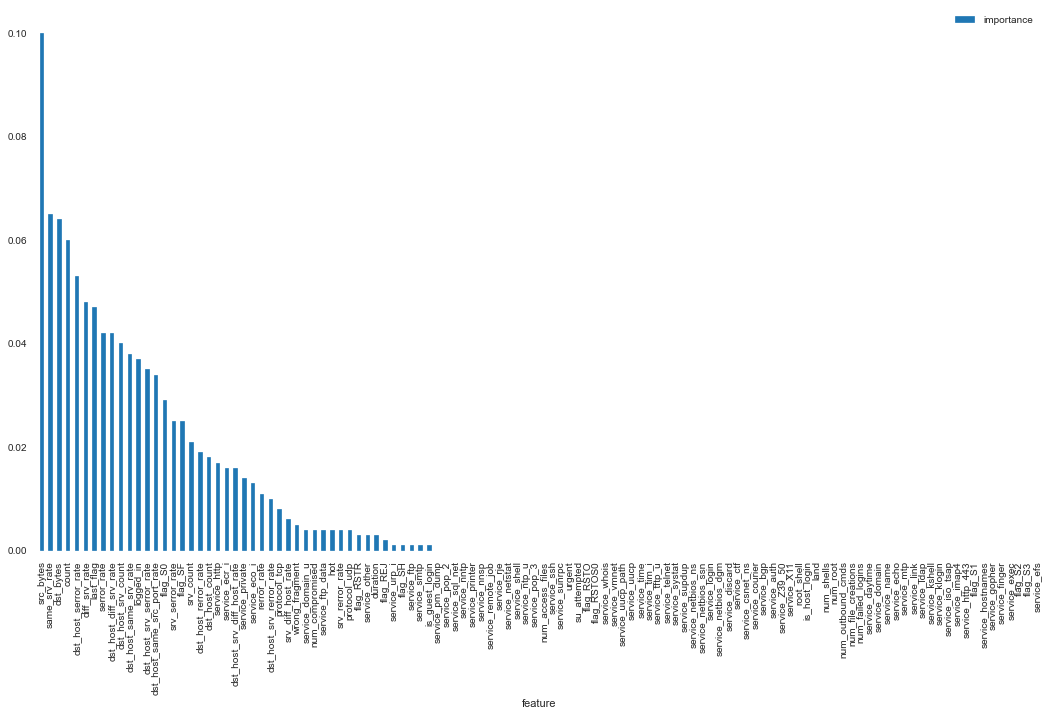

In [57]:
plt.rcParams['figure.figsize'] = (18, 10)
importances.plot.bar();

##### Since very few features are important, we will not be using all the features.

In [58]:
importances_1 = importances.reset_index()

In [59]:
importances_1['feature'][0:25].tolist()

['src_bytes',
 'same_srv_rate',
 'dst_bytes',
 'count',
 'dst_host_serror_rate',
 'diff_srv_rate',
 'last_flag',
 'serror_rate',
 'dst_host_diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'logged_in',
 'dst_host_srv_serror_rate',
 'dst_host_same_src_port_rate',
 'flag_S0',
 'srv_serror_rate',
 'flag_SF',
 'srv_count',
 'dst_host_rerror_rate',
 'dst_host_count',
 'service_http',
 'service_ecr_i',
 'dst_host_srv_diff_host_rate',
 'service_private',
 'service_eco_i']

In [60]:
new_features = ['src_bytes',
 'diff_srv_rate',
 'same_srv_rate',
 'dst_bytes',
 'dst_host_serror_rate',
 'flag_SF',
 'dst_host_srv_serror_rate',
 'last_flag',
 'count',
 'flag_S0',
 'dst_host_same_src_port_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_srv_rate',
 'serror_rate',
 'dst_host_srv_diff_host_rate',
 'srv_serror_rate',
 'srv_count',
 'dst_host_srv_count',
 'dst_host_rerror_rate',
 'logged_in',
 'service_ecr_i',
 'rerror_rate',
 'service_private',
 'dst_host_count',
 'service_eco_i']

In [61]:
X_train_new = X_train[new_features]

In [62]:
X_test_new = X_test[new_features]

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_new)
X_test_scaled = scaler.transform(X_test_new)

In [64]:
radm_clf_new = RandomForestClassifier(oob_score=True,n_estimators=100)
radm_clf_new.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
y_pred = radm_clf_new.predict(X_test_scaled)

In [66]:
radm_clf_new.score(X_test_scaled,y_test)

0.7688861287317571

In [67]:
train_score = radm_clf_new.score(X_train_scaled,y_train)
train_score

1.0

In [68]:
radm_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': y_pred } )
radm_test_pred.head()

,actual,predicted
0,1,1
1,0,0
2,2,2
3,2,0
4,0,0


In [69]:
tree_cm = metrics.confusion_matrix(radm_test_pred.actual,radm_test_pred.predicted,[1,0])

In [70]:
tree_cm

array([[6126, 1287],
       [  67, 9448]])

### SVM Model :

In [71]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

In [73]:
svc = SVC()

In [74]:
svc.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [75]:
y_pred = svc.predict(X_test_scaled)

In [76]:
svc.score(X_test_scaled,y_test)

0.7892472164308211

In [77]:
train_score = svc.score(X_train_scaled,y_train)
train_score

0.9970310862731401

In [81]:
svc_test_pred = pd.DataFrame({'actual': y_test,'predicted': y_pred})
svc_test_pred.head()

,actual,predicted
0,1,1
1,0,0
2,2,2
3,2,0
4,0,0


In [82]:
tree_cm=metrics.confusion_matrix(svc_test_pred.actual,svc_test_pred.predicted,[1,0])

In [83]:
tree_cm

array([[6271,  949],
       [ 113, 9314]])

### Decision tree model : 

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dec_tree = DecisionTreeClassifier(max_depth = 5)

In [86]:
dec_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [87]:
y_pred = dec_tree.predict(X_test_scaled)

In [88]:
dec_tree.score(X_test_scaled,y_test)

0.7799760457791776

In [89]:
train_score = dec_tree.score(X_train_scaled,y_train)
train_score

0.9869336042930175

In [90]:
dectree_test_pred = pd.DataFrame({'actual':y_test,'predicted':y_pred})
dectree_test_pred.head()

,actual,predicted
0,1,1
1,0,0
2,2,2
3,2,2
4,0,0


In [91]:
tree_cm = metrics.confusion_matrix(dectree_test_pred.actual, dectree_test_pred.predicted,[1,0])

In [92]:
tree_cm

array([[5950, 1192],
       [ 158, 9294]])

##### As it is evident from the above classification models, SVM has the best accuracy on the testing dataset as compared to the training dataset for multinomial classification.